# Lesson 3

1. Get Data: excel file containing customer counts per date
2. Prepare data: Irregular time series with duplicate dates 
3. Analyze data
4. Present data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy.random as np
import sys
import matplotlib

%matplotlib inline

In [2]:
print("Python Version"+ sys.version)
print("Pandas Version" + pd.__version__)
print("Matplotlib Version" + matplotlib.__version__)


Python Version3.6.3 |Anaconda custom (64-bit)| (default, Nov  8 2017, 18:10:31) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas Version0.21.0
Matplotlib Version2.1.0


# Creating data

In [3]:
np.seed(111)
def CreateDataSet(Number=1):
    output=[]
    for i in range(Number):
        
        #Creating weekly date ranges
        rng=pd.date_range(start='1/1/2009',end='12/31/2012',freq='W-MON')
        
        #Create Random Data
        data=np.randint(low=25,high=1000,size=len(rng))
        
        #Status pool
        status=[1,2,3]
        
        #Make a random list of statuses
        random_status=[status[np.randint(low=0,high=len(status))]for i in range(len(rng))]
        
        #State Pool
        states=['GA','FL','fl','NY','NJ','TX']
        
        #make a random list of states
        random_states=[states[np.randint(low=0,high=len(states))]for i in range(len(rng))]
        
        output.extend(zip(random_states,random_status,data,rng))
    
    return output


In [7]:
dataset=CreateDataSet(4)
df=pd.DataFrame(data=dataset,columns=['State','Status','CustomerCount','StatusDate'])
df.info
df

State  Status  CustomerCount StatusDate
0      NY       1            973 2009-01-05
1      NJ       1            412 2009-01-12
2      GA       2            252 2009-01-19
3      fl       2            443 2009-01-26
4      fl       1            849 2009-02-02
5      NY       2             93 2009-02-09
6      NJ       2            631 2009-02-16
7      NJ       3            586 2009-02-23
8      GA       1            406 2009-03-02
9      GA       1            290 2009-03-09
10     FL       2            889 2009-03-16
11     GA       1            114 2009-03-23
12     NY       3            450 2009-03-30
13     GA       1            299 2009-04-06
14     fl       2            352 2009-04-13
15     NJ       2            695 2009-04-20
16     FL       1            299 2009-04-27
17     TX       1            683 2009-05-04
18     FL       3            262 2009-05-11
19     GA       2            425 2009-05-18
20     fl       2            465 2009-05-25
21     fl       1            913 2009-06-01
22     NY       1            940 2009-06-08
23     FL       3            189 2009-06-15
24     NY       1            551 2009-06-22
25     TX       1             56 2009-06-29
26     NY       1            814 2009-07-06
27     NJ       3            497 2009-07-13
28     TX       2            697 2009-07-20
29     fl       3            496 2009-07-27
..    ...     ...            ...        ...
806    NJ       1            550 2012-06-11
807    NY       2            508 2012-06-18
808    TX       3            582 2012-06-25
809    FL       1            460 2012-07-02
810    FL       3            346 2012-07-09
811    NY       1            372 2012-07-16
812    NJ       2            950 2012-07-23
813    FL       3            461 2012-07-30
814    TX       2             60 2012-08-06
815    TX       1            750 2012-08-13
816    FL       1             31 2012-08-20
817    TX       1            706 2012-08-27
818    FL       3            756 2012-09-03
819    NJ       1            159 2012-09-10
820    TX       2            177 2012-09-17
821    TX       3             91 2012-09-24
822    FL       1            805 2012-10-01
823    FL       2            920 2012-10-08
824    GA       1            984 2012-10-15
825    NY       3            421 2012-10-22
826    TX       2            791 2012-10-29
827    TX       3            822 2012-11-05
828    FL       3            811 2012-11-12
829    NJ       2            764 2012-11-19
830    FL       2            841 2012-11-26
831    NY       2            587 2012-12-03
832    GA       3            989 2012-12-10
833    GA       2            646 2012-12-17
834    FL       3             27 2012-12-24
835    NJ       1            859 2012-12-31

[836 rows x 4 columns]

In [8]:
df.describe()

Status  CustomerCount
count  836.000000     836.000000
mean     2.002392     522.400718
std      0.813063     288.512744
min      1.000000      25.000000
25%      1.000000     267.250000
50%      2.000000     547.500000
75%      3.000000     764.000000
max      3.000000     998.000000

Save it into an Excel file and bring it back to dataframe

In [9]:
df.to_excel("Lesson3.xlsx",index=False)
print("Done")

Done


# Grabbing the data from Excel

In [10]:
Location=r"/Users/shengyuchen/Dropbox/Engagement - Business/My Hub/AI:ML:DL Playground/Pandas Tutorial/Lesson3.xlsx"

df=pd.read_excel(Location,0,index_col="StatusDate")
df.dtypes

State            object
Status            int64
CustomerCount     int64
dtype: object

In [12]:
df.index

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name='StatusDate', length=836, freq=None)

In [13]:
df.head()

State  Status  CustomerCount
StatusDate                             
2009-01-05    NY       1            973
2009-01-12    NJ       1            412
2009-01-19    GA       2            252
2009-01-26    fl       2            443
2009-02-02    fl       1            849

# Preparation of the data
Goals of the preparation:
1. State Column is in all uppercase
2. Select records where status is 1
3. Merger NJ and NY in the state column
4. REmove any outliers

In [14]:
df['State'].unique()

array(['NY', 'NJ', 'GA', 'fl', 'FL', 'TX'], dtype=object)

In [16]:
df['State']=df.State.apply(lambda x: x.upper())

In [19]:
df["State"].unique()

array(['NY', 'NJ', 'GA', 'FL', 'TX'], dtype=object)

In [20]:
#Grabbing states where status equals to 1
mask=df['Status']==1
df=df[mask]

In [23]:
df.CustomerCount.describe()

count    275.000000
mean     550.298182
std      295.165941
min       26.000000
25%      299.000000
50%      578.000000
75%      811.500000
max      998.000000
Name: CustomerCount, dtype: float64

In [24]:
#Turning all states whose states in NJ in NY 
mask=df.State=="NJ" #This is finding the indices of all the rows that equal to NJ
df["State"][mask]='NY'

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [25]:
df['State'].unique()

array(['NY', 'FL', 'GA', 'TX'], dtype=object)

In [26]:
mask.head()

StatusDate
2009-01-05    False
2009-01-12     True
2009-02-02    False
2009-03-02    False
2009-03-09    False
Name: State, dtype: bool

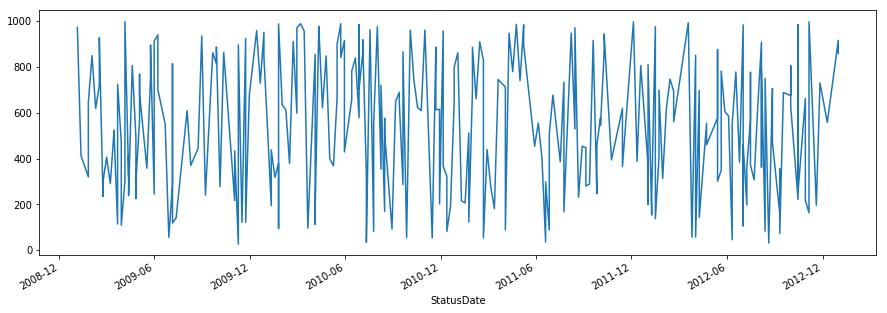

In [28]:
df.CustomerCount.plot(figsize=(15,5)); #One way to call the customerCount column

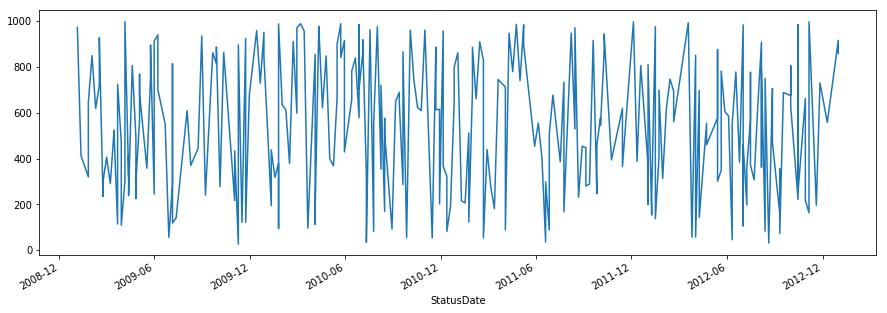

In [29]:
df['CustomerCount'].plot(figsize=(15,5)); #The second way to call the customer count column

In [31]:
#Adding all the values in the customer Count column per state for each day
sortdf=df[df['State']=="NY"].sort_index(axis=0)
sortdf.head(10)

State  Status  CustomerCount
StatusDate                             
2009-01-05    NY       1            973
2009-01-12    NY       1            412
2009-01-26    NY       1            320
2009-01-26    NY       1            646
2009-02-09    NY       1            619
2009-02-16    NY       1            925
2009-02-23    NY       1            234
2009-02-23    NY       1            299
2009-03-16    NY       1            524
2009-03-23    NY       1            724

In [36]:
#Group by the state and status date  
#Using the following to perform some aggregations 
Daily=df.reset_index().groupby(['State','StatusDate']).sum()
Daily.head()

Status  CustomerCount
State StatusDate                       
FL    2009-02-02       1            849
      2009-02-16       1            719
      2009-03-30       1            474
      2009-04-13       1            414
      2009-04-27       2            793

In [39]:
test1=df.reset_index().groupby(["State"]).sum()
test1.head()

CustomerCount
State Status               
FL    1               39572
GA    1               25210
NY    1               56085
TX    1               30465

In [41]:
test2=df.reset_index().groupby("Status").sum()
test2.head()

CustomerCount
Status               
1              151332

The State and StatusDate columns are automatically placed in the index of the Daily dataframe. You can think of the index as the primary key of a database table but without the constraint of having unique values. Columns in the index as you will see allow us to easily select, plot, and perform calculations on the data.

In [42]:
del Daily['Status']
Daily.head()

CustomerCount
State StatusDate               
FL    2009-02-02            849
      2009-02-16            719
      2009-03-30            474
      2009-04-13            414
      2009-04-27            793

In [44]:
Daily.index

MultiIndex(levels=[['FL', 'GA', 'NY', 'TX'], [2009-01-05 00:00:00, 2009-01-12 00:00:00, 2009-01-26 00:00:00, 2009-02-02 00:00:00, 2009-02-09 00:00:00, 2009-02-16 00:00:00, 2009-02-23 00:00:00, 2009-03-02 00:00:00, 2009-03-09 00:00:00, 2009-03-16 00:00:00, 2009-03-23 00:00:00, 2009-03-30 00:00:00, 2009-04-06 00:00:00, 2009-04-13 00:00:00, 2009-04-20 00:00:00, 2009-04-27 00:00:00, 2009-05-04 00:00:00, 2009-05-18 00:00:00, 2009-05-25 00:00:00, 2009-06-01 00:00:00, 2009-06-08 00:00:00, 2009-06-22 00:00:00, 2009-06-29 00:00:00, 2009-07-06 00:00:00, 2009-07-13 00:00:00, 2009-08-03 00:00:00, 2009-08-10 00:00:00, 2009-08-24 00:00:00, 2009-08-31 00:00:00, 2009-09-07 00:00:00, 2009-09-21 00:00:00, 2009-09-28 00:00:00, 2009-10-05 00:00:00, 2009-10-12 00:00:00, 2009-11-02 00:00:00, 2009-11-09 00:00:00, 2009-11-16 00:00:00, 2009-11-23 00:00:00, 2009-11-30 00:00:00, 2009-12-14 00:00:00, 2009-12-21 00:00:00, 2009-12-28 00:00:00, 2010-01-04 00:00:00, 2010-01-11 00:00:00, 2010-01-18 00:00:00, 2010-01-2

In [46]:
#Retrieving the first level index
Daily.index.levels[0]

Index(['FL', 'GA', 'NY', 'TX'], dtype='object', name='State')

In [47]:
#Retrieving the second level index
Daily.index.levels[1]

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-26', '2009-02-02',
               '2009-02-09', '2009-02-16', '2009-02-23', '2009-03-02',
               '2009-03-09', '2009-03-16',
               ...
               '2012-09-10', '2012-09-17', '2012-10-01', '2012-10-15',
               '2012-10-29', '2012-11-05', '2012-11-19', '2012-11-26',
               '2012-12-10', '2012-12-31'],
              dtype='datetime64[ns]', name='StatusDate', length=170, freq=None)

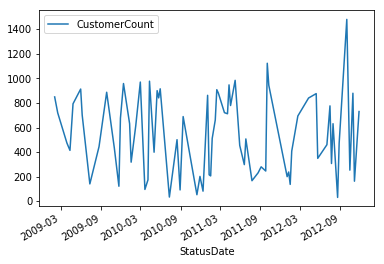

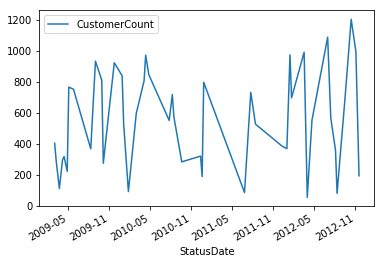

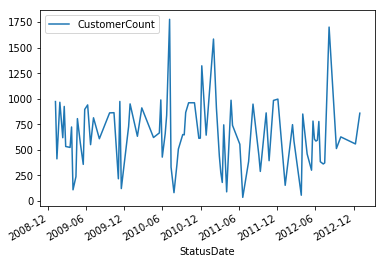

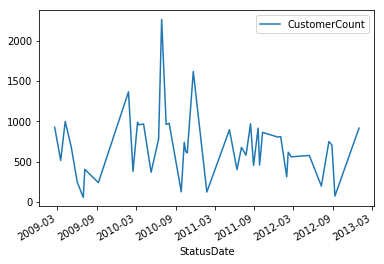

In [48]:
Daily.loc['FL'].plot()
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['TX'].plot();

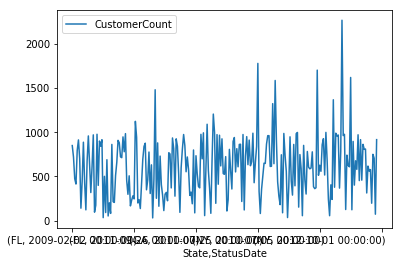

In [49]:
Daily.plot()

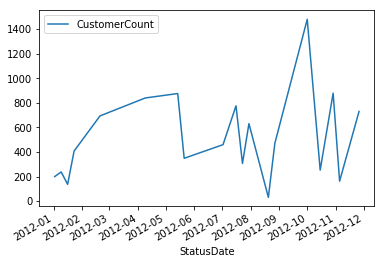

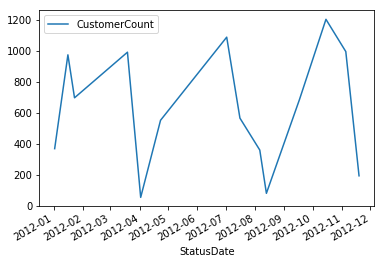

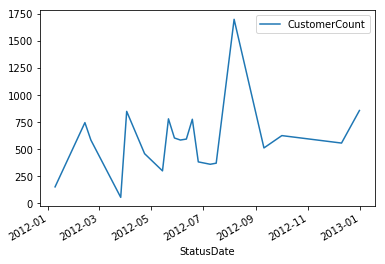

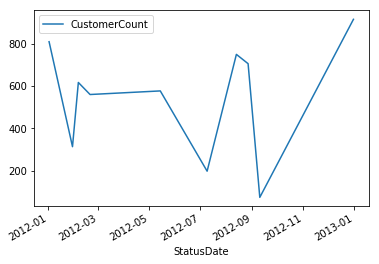

In [50]:
Daily.loc['FL']['2012':].plot()
Daily.loc['GA']['2012':].plot()
Daily.loc['NY']['2012':].plot()
Daily.loc['TX']['2012':].plot();

Any data outside of a specific range shoould be removed from the datase
StateYearMonth - Here we group by State, Year of StatusDate, and Month of StatusDate.
Daily['Outlier'] - A boolean (True or False) value letting us know if the value in the customerCount column is outside the acceptable range

### Transform vs Apply
We will be using the attribute transform instead of apply. The reason is that transform will keep the shape(# of rows and columns) of the dataframe the same and apply will not. By looking at the previous graphs, we can realize they are not resembling a gaussian distribution, this means we cannot use summary statistics like the mean and stDev. We use percentiles instead. Note that we run the risk of eliminating good data.



In [74]:
#Calculate the outliers by introducing new columns to the dataframe
StateYearMonth=Daily.groupby([Daily.index.get_level_values(0),
                              Daily.index.get_level_values(1).month])
Daily['Lower']=StateYearMonth['CustomerCount'].transform(
    lambda x:x.quantile(q=.25)-(1.5*x.quantile(q=.75)-x.quantile(q=.25)))
Daily['Upper']=StateYearMonth['CustomerCount'].transform(
    lambda x:x.quantile(q=.75)+1.5*x.quantile(q=.75)-x.quantile(q=.25))
Daily['Outlier'] = (Daily['CustomerCount'] < Daily['Lower'])| (Daily['CustomerCount'] > Daily['Upper']) 
#Removing the outliers

In [73]:
Daily.head()

CustomerCount    Lower     Upper  Outlier
State StatusDate                                           
FL    2009-02-02            849   57.500  1485.000    False
      2009-02-16            719   57.500  1485.000    False
      2009-03-30            474 -415.875  1578.625    False
      2009-04-13            414  -25.125  1529.375    False
      2009-04-27            793  -25.125  1529.375    False

In [81]:
#Combine all markets
#Get the max customer count by date
ALL=pd.DataFrame(
    Daily["CustomerCount"].groupby(Daily.index.get_level_values(1)).sum())
ALL.columns=['CustomerCount']
ALL.head()

#Group by Year and MOnth
YearMonth=ALL.groupby([lambda x:x.year, lambda x:x.month])
YearMonth.head()

#What is the max customer count per year and month
ALL["Max"]=YearMonth['CustomerCount'].transform(lambda x:x.max())
ALL.head()


CustomerCount   Max
StatusDate                     
2009-01-05            973   973
2009-01-12            412   973
2009-01-26            966   973
2009-02-02            849  2571
2009-02-09            619  2571

By choosing the frequency to be A or annual we will be able to get the three target dates from above.

In [91]:
#Create the BHAG dataframe
data=[1000,2000,3000]
idx=pd.date_range(start="12/31/2011",end="12/31/2013",freq="A")
BHAG=pd.DataFrame(data, index=idx, columns=['BHAG'])
BHAG

BHAG
2011-12-31  1000
2012-12-31  2000
2013-12-31  3000

Combining dataframes as we have learned in previous lesson is made simple using the concat function. Remember when we choose axis = 0 we are appending row wise.

In [92]:
#Combin the BHAG and the ALL data set
combined=pd.concat([ALL,BHAG],axis=0)
combined=combined.sort_index(axis=0)
combined.tail()

BHAG  CustomerCount     Max
2012-11-26     NaN          730.0  1160.0
2012-12-10     NaN          558.0  1775.0
2012-12-31     NaN         1775.0  1775.0
2012-12-31  2000.0            NaN     NaN
2013-12-31  3000.0            NaN     NaN

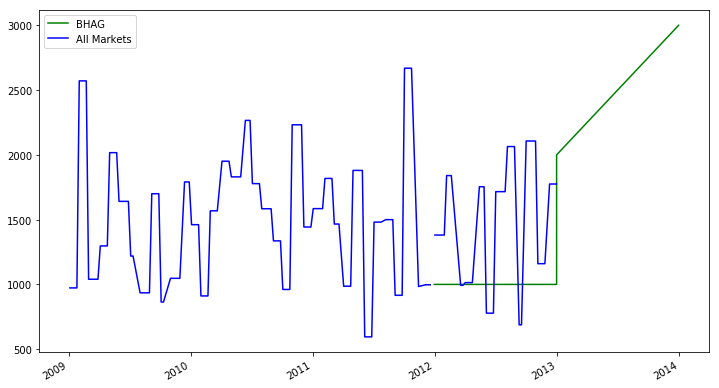

In [94]:
fig,axes=plt.subplots(figsize=(12,7))
combined['BHAG'].fillna(method='pad').plot(color="green",label="BHAG")
combined['Max'].plot(color='blue',label="All Markets")
plt.legend(loc='best')

In [99]:
#Group by year and then get the max value per year
Year=combined.groupby(lambda x:x.year).max()
Year

BHAG  CustomerCount     Max
2009     NaN         2571.0  2571.0
2010     NaN         2266.0  2266.0
2011  1000.0         2669.0  2669.0
2012  2000.0         2107.0  2107.0
2013  3000.0            NaN     NaN

In [100]:
#Add a column representing the percent change per year
Year['YR_PCT_Change']=Year['Max'].pct_change(periods=1)
Year

BHAG  CustomerCount     Max  YR_PCT_Change
2009     NaN         2571.0  2571.0            NaN
2010     NaN         2266.0  2266.0      -0.118631
2011  1000.0         2669.0  2669.0       0.177846
2012  2000.0         2107.0  2107.0      -0.210566
2013  3000.0            NaN     NaN            NaN

In [113]:
(1+Year.loc[2012,'YR_PCT_Change'])*Year.loc[2012,'Max']

1663.3379542899963

In [112]:
Year['Max']

2009    2571.0
2010    2266.0
2011    2669.0
2012    2107.0
2013       NaN
Name: Max, dtype: float64

# Present Data

Text(0.5,1,'North East')

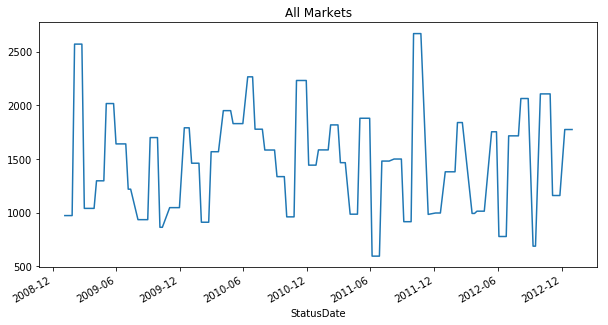

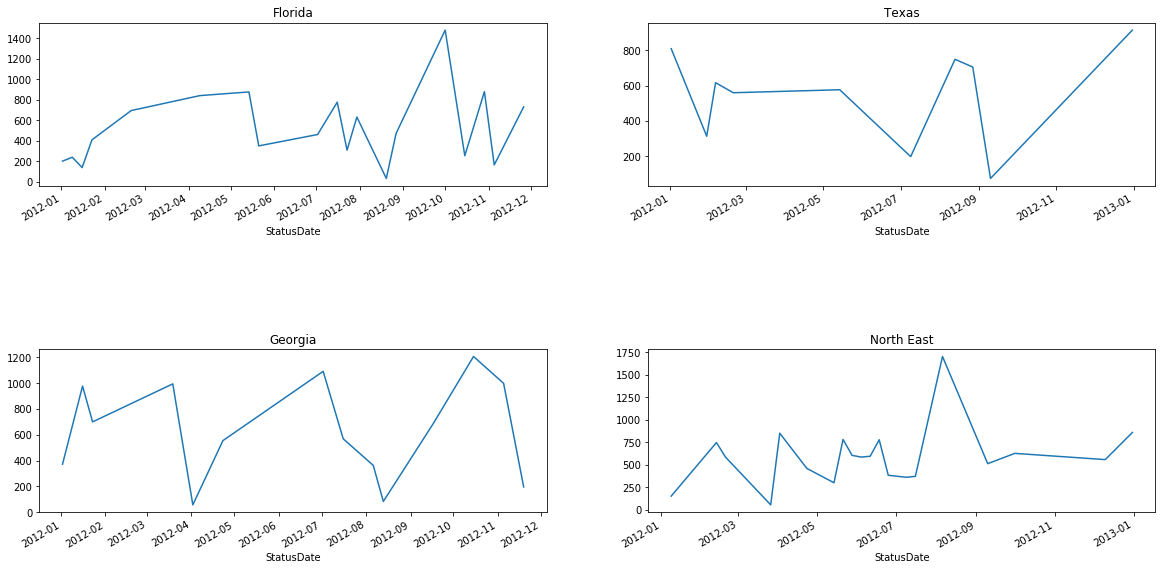

In [117]:
#First Graph
ALL["Max"].plot(figsize=(10,5));plt.title("All Markets")

#Last Four Graphs
fig, axes=plt.subplots(nrows=2,ncols=2,figsize=(20,10))
fig.subplots_adjust(hspace=1.0) ##Create Space between plots

Daily.loc["FL"]["CustomerCount"]["2012":].fillna(method='pad').plot(ax=axes[0,0])
Daily.loc["GA"]["CustomerCount"]["2012":].fillna(method='pad').plot(ax=axes[1,0])
Daily.loc["TX"]["CustomerCount"]["2012":].fillna(method='pad').plot(ax=axes[0,1])
Daily.loc["NY"]["CustomerCount"]["2012":].fillna(method='pad').plot(ax=axes[1,1])

#Add titles
axes[0,0].set_title("Florida")
axes[1,0].set_title("Georgia")
axes[0,1].set_title("Texas")
axes[1,1].set_title("North East")